<a href="https://colab.research.google.com/github/devika-kla/Machine-learning-tasks/blob/main/XAI_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statistics import mode
import re
from sklearn.ensemble import RandomForestClassifier

In [ ]:
col_names = ['Pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
 # load dataset
pima = pd.read_csv("/content/drive/MyDrive/MSC/SEM3/Explainable ai/diabetes.csv", header=None, names=col_names)
pima = pima.drop(pima.index[0])
pima.head()

,Pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   bp           768 non-null    int64  
 3   skin         768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   pedigree     768 non-null    float64
 7   age          768 non-null    int64  
 8   label        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima[['Pregnancies','glucose','bp','skin','insulin','age','label']] = pima[['Pregnancies','glucose','bp','skin','insulin','age','label']].astype('int')
pima[['pedigree','bmi']]=pima[['pedigree','bmi']].astype('float')


In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
X.head()

,Pregnancies,insulin,bmi,age,glucose,bp,pedigree
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
5,0,168,43.1,33,137,40,2.288


In [ ]:
X.shape

(768, 7)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
RF=RandomForestClassifier(criterion='entropy')

In [ ]:
 #Using GridSearchCV() to tune hyperparameters:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 20, 30, 40],'max_depth': [2, 3]}]
grid_search = GridSearchCV(estimator = RF, param_grid = parameters, scoring='accuracy', cv = 3, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_,grid_search.best_score_

({'max_depth': 3, 'n_estimators': 30}, 0.7523277467411545)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=30)

In [ ]:
RF = grid_search.best_estimator_.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[135  11]
 [ 39  46]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       146
           1       0.81      0.54      0.65        85

    accuracy                           0.78       231
   macro avg       0.79      0.73      0.75       231
weighted avg       0.79      0.78      0.77       231



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr_xg, tpr_xg, thresholds = metrics.roc_curve(y_test, y_pred)
print(metrics.auc(fpr_xg, tpr_xg))

0.7329170024174053


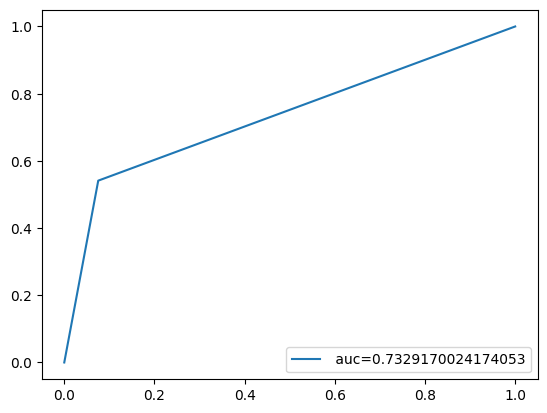

In [ ]:
auc_xgb = np.trapz(tpr_xg,fpr_xg)
plt.plot(fpr_xg,tpr_xg,label=" auc="+str(auc_xgb))
plt.legend(loc=4)
plt.show()

In [ ]:
feature_imp = pd.Series(RF.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

glucose        0.424073
bmi            0.208346
age            0.140197
Pregnancies    0.067773
pedigree       0.064101
insulin        0.058912
bp             0.036599
dtype: float64

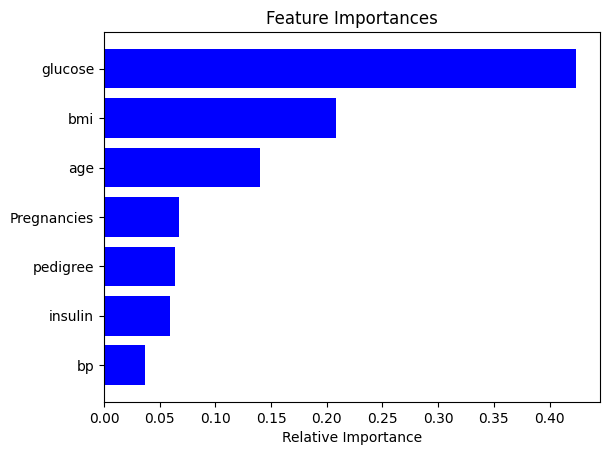

In [ ]:
features = feature_cols
importances = RF.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()